# Figures presented in the Publication

*Probabilistic Framework for Integration of Mass Spectrum and Retention Time Information in Metabolite Identification*

by: Eric Bach, Simon Rogers, John Williamson and Juho Rousu, 2020

In [1]:
%load_ext autoreload
%autoreload 2

import os

In [2]:
result_version = "v0.2.0"

## Main Document

### Effect of the Number of Random Spanning Trees

Experiment varying the number of random spanning trees and comparison between max- and sum-margin, see **Section 4.1** and **Figure 2**.

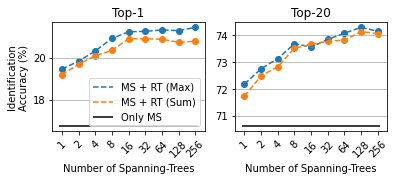

In [5]:
from msmsrt_scorer.experiments.figures_and_tables import figure__number_of_random_spanning_trees

fig, _ = figure__number_of_random_spanning_trees(result_version)
fig.savefig(os.path.join(result_version, "images_for_paper", "number_of_random_spanning_trees.pdf"))

The reviewer asked to add error bars to the number of spanning-tree plot. In the following we show a slide modification of Figure 2 adding 95% confidence intervals estimated using bootstrapping (1000 samples). 

top-1 0.00390625 top-20 0.0078125


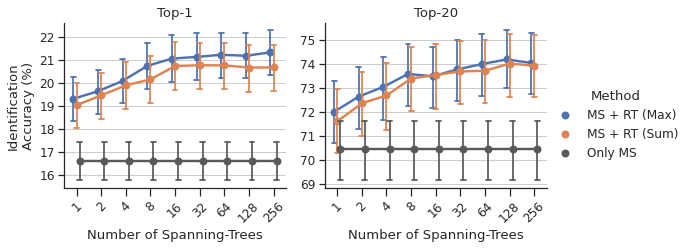

In [116]:
from msmsrt_scorer.experiments.figures_and_tables import figure__number_of_random_spanning_trees__WITH_CI

g = figure__number_of_random_spanning_trees__WITH_CI(result_version)
g.savefig(os.path.join(result_version, "images_for_paper", "number_of_random_spanning_trees__WITH_CI.pdf"))

### Missing MS2

Improvement achived by integrating MS and RT information when some MS-features do not have an MS2 spectrum. The results of this experiment are discussed in **Section 4.3** and shown in **Figure 3**.

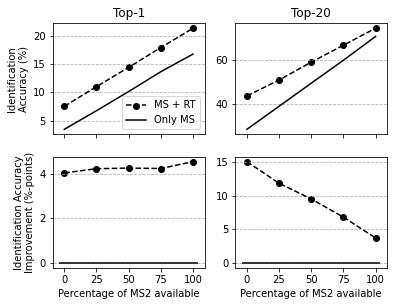

In [7]:
from msmsrt_scorer.experiments.figures_and_tables import figure__missing_ms2

fig, _ = figure__missing_ms2(result_version)
fig.savefig(os.path.join(result_version, "images_for_paper", "missing_ms2.pdf"))

## Supplementary Figures 

### Runtime Analysis

We analysed the runtime of our proposed method on a machine equipted with a [Xeon E5 2680 v3](https://ark.intel.com/content/www/us/en/ark/products/81908/intel-xeon-processor-e5-2680-v3-30m-cache-2-50-ghz.html) CPU (12 cores) and 128Gb of RAM. The score-integration framework can be parallelized by distributing the margin calculations for the different random spanning trees across the CPU cores. Here, we used all 12 cores for the computation. 

Could not open results for CASMI (positive).


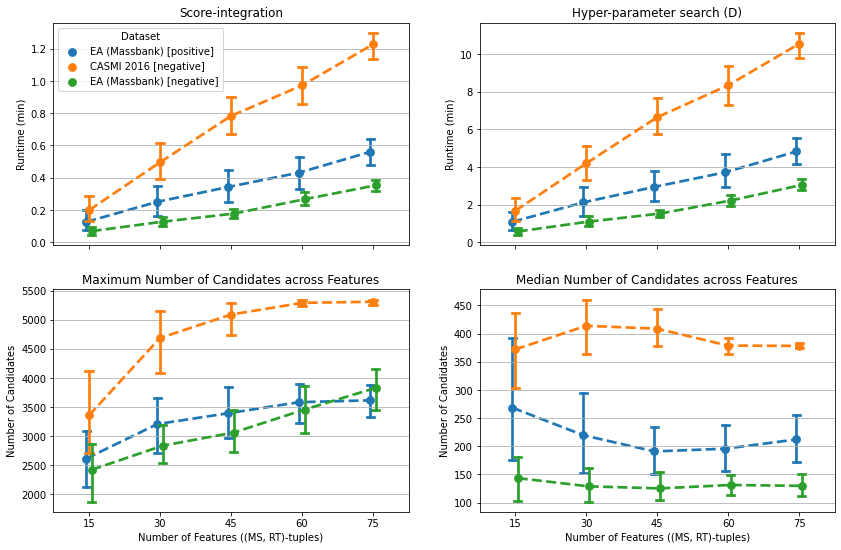

In [88]:
from msmsrt_scorer.experiments.figures_and_tables import figure__runtime_analysis

fig, _, results = figure__runtime_analysis(result_version, time_unit="min")
fig.savefig(os.path.join(result_version, "images_for_paper", "runtime.pdf"))

### Parameter Selection (not in the paper)

We studied the efficiency of our hyper-parameter selection procedure: "Are the, based on the training set, frequently selected retention order weights ($D$) those that lead to good performance on the test sets?".

sigmoid - Selected 'D' value: mean = 0.230, median = 0.250, most frequent = 0.250
stepfun - Selected 'D' value: mean = 0.116, median = 0.050, most frequent = 0.050


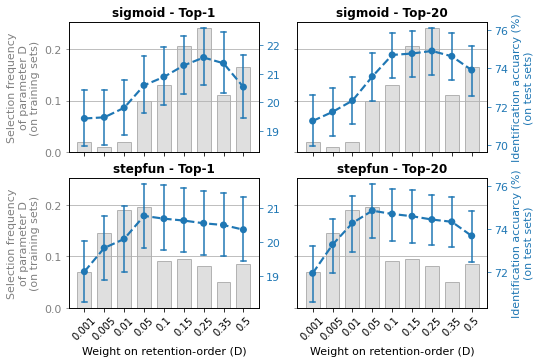

In [5]:
from msmsrt_scorer.experiments.figures_and_tables import figure__parameter_selection

fig, _ = figure__parameter_selection(result_version)
fig.savefig(os.path.join(result_version, "images_for_paper", "parameter_selection.pdf"))

#### Plots for each individual dataset and ionization mode

(Uncomment to produce plots)

In [134]:
#fig, _ = figure__parameter_selection(result_version, dataset="EA", ion_mode="positive",
#                                     plot_baseline=False, plot_performance_for="test")
# > sigmoid - Selected 'D' value: mean = 0.27, median = 0.25, most frequent = 0.150
# > stepfun - Selected 'D' value: mean = 0.10, median = 0.05, most frequent = 0.050

In [135]:
#fig, _ = figure__parameter_selection(result_version, dataset="EA", ion_mode="negative",
#                                     plot_baseline=False, plot_performance_for="test")
# > sigmoid - Selected 'D' value: mean = 0.28, median = 0.25, most frequent = 0.500
# > stepfun - Selected 'D' value: mean = 0.09, median = 0.05, most frequent = 0.010

In [136]:
#fig, _ = figure__parameter_selection(result_version, dataset="CASMI", ion_mode="positive",
#                                     plot_baseline=False, plot_performance_for="test")
# > sigmoid - Selected 'D' value: mean = 0.20, median = 0.25, most frequent = 0.250
# > stepfun - Selected 'D' value: mean = 0.20, median = 0.15, most frequent = 0.150

In [137]:
#fig, _ = figure__parameter_selection(result_version, dataset="CASMI", ion_mode="negative",
#                                     plot_baseline=False, plot_performance_for="test")
# > sigmoid - Selected 'D' value: mean = 0.17, median = 0.100, most frequent = 0.050
# > stepfun - Selected 'D' value: mean = 0.08, median = 0.005, most frequent = 0.005

The selected retention-order weight ($D$) varies across the different datasets and ionizations, as can be seen in the following table:

| Edge-potential Function | Dataset | Ionization | Average $D$ | Median $D$ | Most frequent $D$ | 
| --- | --- | --- | --- | --- | --- |
| Sigmoid | EA (Massbank) | Positive | $0.27$ | $0.25$ | $0.15$ |
| | EA (Massbank) | Negative | $0.28$ | $0.25$ | $0.5$ |
| | CASMI 2016 | Positive | $0.2$ | $0.25$ | $0.25$ |
| | CASMI 2016 | Negative | $0.17$ | $0.1$ | $0.05$ |
| --- | --- | --- | --- | --- |
| Step-Function | EA (Massbank) | Positive | $0.1$ | $0.05$ | $0.05$ |
| | EA (Massbank) | Negative | $0.09$ | $0.05$ | $0.01$ |
| | CASMI 2016 | Positive | $0.2$ | $0.15$ | $0.15$ |
| | CASMI 2016 | Negative | $0.08$ | $0.005$ | $0.005$ |

The results indicate, that the retention-order weight should be re-optimized for each (Edge-potential, Dataset, Ionization) settup. However, we need to consider, that the test and training molecules for the (Dataset, Ionization) settings are different. Meaning that, the variance we observe hyper-prameter variance originates partially from the homogenius molecule sets. Thereby for each set the retention-time probably add a different amount of "useful" additional information. 